### Import libraries

In [1]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
keras.__version__

'2.9.0'

### Loading dataset
#### Medical Cost Personal Datasets
Source: https://www.kaggle.com/mirichoi0218/insurance

Datafields:

* age: age of primary beneficiary 

* sex: insurance contractor gender (female, male)

* bmi: Body mass index, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

In [4]:
data = pd.read_csv('datasets/insurance.csv')

data.sample(10)

,age,sex,bmi,children,smoker,region,charges
83,48,female,41.230,4,no,northwest,11033.66170
518,35,female,31.000,1,no,southwest,5240.76500
956,54,male,30.800,1,yes,southeast,41999.52000
404,31,male,20.400,0,no,southwest,3260.19900
1176,52,female,24.130,1,yes,northwest,23887.66270
887,36,female,30.020,0,no,northwest,5272.17580
165,47,male,28.215,4,no,northeast,10407.08585
1063,36,male,28.595,3,no,northwest,6548.19505
632,29,female,35.530,0,no,southeast,3366.66970
1171,43,female,26.700,2,yes,southwest,22478.60000


In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Visualizing Dataset

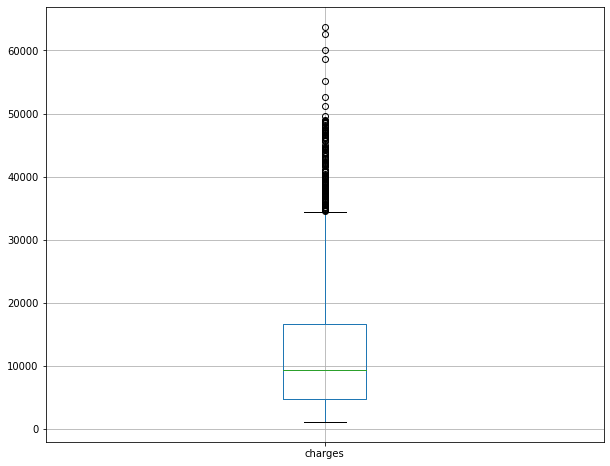

In [11]:
plt.figure(figsize=(10, 8))

data.boxplot('charges')

plt.show()

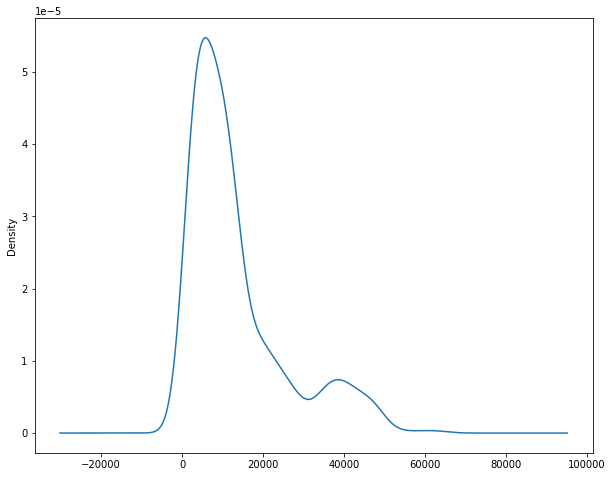

In [12]:
plt.figure(figsize=(10, 8))

data['charges'].plot.kde()

plt.show()

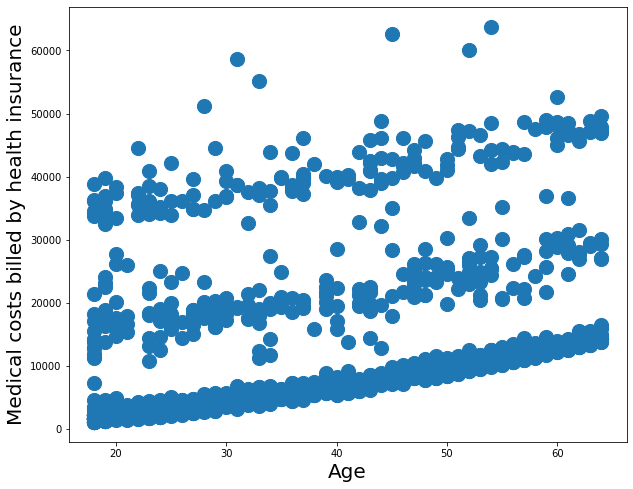

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(data['age'], data['charges'], s=200)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

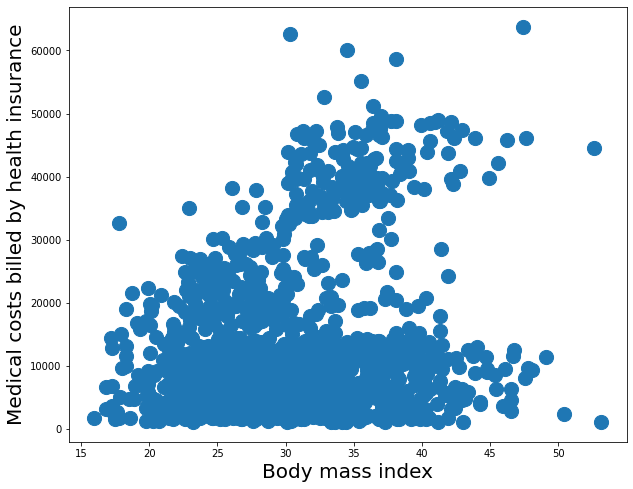

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(data['bmi'], data['charges'], s=200)

plt.xlabel('Body mass index', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

In [15]:
data_corr = data.corr()

data_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


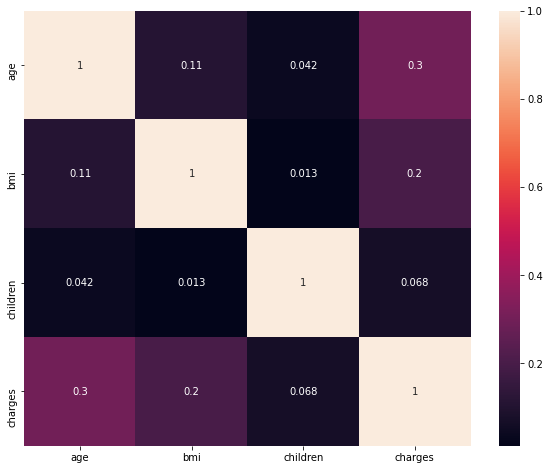

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [17]:
features = data.drop('charges', axis=1)

target = data[['charges']]

In [18]:
features.sample(10)

,age,sex,bmi,children,smoker,region
732,24,female,30.10,3,no,southwest
534,64,male,40.48,0,no,southeast
536,33,female,38.90,3,no,southwest
1215,18,male,39.14,0,no,northeast
760,22,female,34.58,2,no,northeast
379,62,male,31.46,1,no,southeast
1083,32,male,31.50,1,no,southwest
482,18,female,31.35,0,no,southeast
70,27,female,24.75,0,yes,southeast
297,47,male,25.41,1,yes,southeast


In [19]:
target.sample(10)

,charges
1142,27117.99378
1034,12950.07120
1139,36898.73308
620,3659.34600
1249,37607.52770
699,3500.61230
741,18246.49550
1124,40904.19950
1333,10600.54830
1138,3704.35450


In [20]:
categorical_features = features[['sex', 'smoker', 'region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [21]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1)

numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [22]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [23]:
smoker_dict = {'no':0, 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


# get_dummies

In [24]:
categorical_features = pd.get_dummies(categorical_features, columns=['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [25]:
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [26]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


# concat

In [27]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [28]:
processed_features.shape

(1338, 9)

In [29]:
target.head(10)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [30]:
processed_data = pd.concat([processed_features, target], axis=1,
                            sort=False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [31]:
processed_data.to_csv('datasets/insurance_processed.csv', index=False)

### Splitting dataset into training and testing data

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [33]:
x_train.shape

(1070, 9)

In [34]:
x_test.shape

(268, 9)

### Building model with relu activation function

In [35]:
def build_model():#anothr option
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [36]:
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


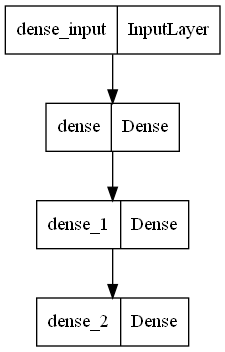

In [37]:
keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

# Save to png

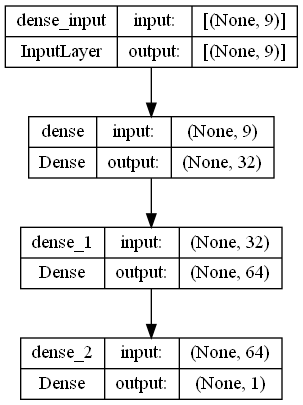

In [38]:
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

In [39]:
!ls *.png

'ls' is not recognized as an internal or external command,
operable program or batch file.


### Training model

In [40]:
n_epochs = 1000

training_hist = model_relu_64.fit(x_train, 
                                  y_train,
                                  epochs = n_epochs, 
                                  validation_split = 0.2, 
                                  verbose = True)

Epoch 1/1000
27/27 [==============================] - 1s 12ms/step - loss: 317048096.0000 - mae: 13317.2754 - mse: 317048096.0000 - val_loss: 336091488.0000 - val_mae: 12876.3672 - val_mse: 336091488.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 316993184.0000 - mae: 13315.3477 - mse: 316993184.0000 - val_loss: 336008704.0000 - val_mae: 12873.4600 - val_mse: 336008704.0000
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: 316871104.0000 - mae: 13311.2900 - mse: 316871104.0000 - val_loss: 335832640.0000 - val_mae: 12867.3643 - val_mse: 335832640.0000
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 316632352.0000 - mae: 13303.0479 - mse: 316632352.0000 - val_loss: 335486528.0000 - val_mae: 12855.6123 - val_mse: 335486528.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 316180320.0000 - mae: 13288.2031 - mse: 316180320.0000 - val_loss: 334875776.0000 - val_mae: 12835.1943 - val

In [41]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20442468.0,2715.304932,20442468.0,21662132.0,2763.467773,21662132.0,995
996,20446740.0,2729.173828,20446740.0,21642202.0,2762.219727,21642202.0,996
997,20443342.0,2685.478271,20443342.0,21523204.0,2718.437988,21523204.0,997
998,20440418.0,2698.408936,20440418.0,21618516.0,2750.815674,21618516.0,998
999,20452636.0,2684.700928,20452636.0,21592542.0,2743.678711,21592542.0,999


In [44]:
y_pred = model_relu_64.predict(x_test).flatten()



9/9 [==============================] - 0s 2ms/step


In [45]:
r2_score(y_test, y_pred)

0.8687380318806435

### Building model with elu activation function

In [46]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [47]:
model_elu_64 = build_model()

model_elu_64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


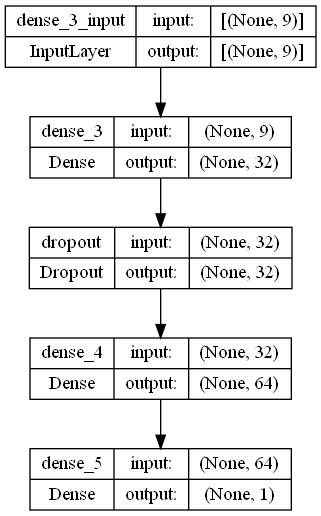

In [48]:
keras.utils.plot_model(model_elu_64, 'model_elu_64_shapes.png', show_shapes=True)

### Training model (build with elu activation function and dropout)

In [50]:
training_hist= model_elu_64.fit(x_train, 
                                y_train,
                                epochs = n_epochs, 
                                validation_split = 0.2, 
                                verbose = True
                                )

Epoch 1/1000
27/27 [==============================] - 1s 9ms/step - loss: 317052288.0000 - mae: 13317.5049 - mse: 317052288.0000 - val_loss: 336089120.0000 - val_mae: 12876.6201 - val_mse: 336089120.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 316994784.0000 - mae: 13315.6035 - mse: 316994784.0000 - val_loss: 336004832.0000 - val_mae: 12873.9365 - val_mse: 336004832.0000
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 316879776.0000 - mae: 13311.8750 - mse: 316879776.0000 - val_loss: 335840128.0000 - val_mae: 12868.6289 - val_mse: 335840128.0000
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 316661856.0000 - mae: 13304.7363 - mse: 316661856.0000 - val_loss: 335544192.0000 - val_mae: 12858.9062 - val_mse: 335544192.0000
Epoch 5/1000
27/27 [==============================] - 0s 3ms/step - loss: 316303520.0000 - mae: 13292.4814 - mse: 316303520.0000 - val_loss: 335075680.0000 - val_mae: 12843.3350 - val_

# Display epoches

In [51]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,28592278.0,3507.373291,28592278.0,22397328.0,2696.092041,22397328.0,995
996,27585136.0,3446.509521,27585136.0,22393590.0,2669.242188,22393590.0,996
997,27182608.0,3382.321045,27182608.0,22399260.0,2691.898926,22399260.0,997
998,27954242.0,3441.187012,27954242.0,22390190.0,2685.432617,22390190.0,998
999,27623880.0,3446.569580,27623880.0,22371386.0,2660.719238,22371386.0,999


In [53]:
model_elu_64.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 22169496.0000 - mae: 2735.0322 - mse: 22169496.0000


[22169496.0, 2735.0322265625, 22169496.0]

9/9 [==============================] - 0s 1ms/step


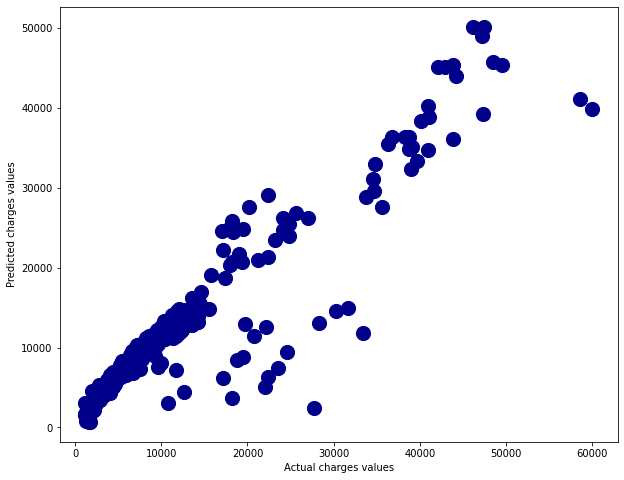

In [57]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [58]:
r2_score(y_test, y_pred)

0.8514911494938535

# Building model with Earlystopping callback

In [61]:
model_relu_with_ES = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)#<----------5 if not enhanced

training_history = model_relu_with_ES.fit(x_train, 
                                       y_train, 
                                       epochs=n_epochs, 
                                       validation_split = 0.2, 
                                       verbose=False, 
                                       callbacks=[early_stop])#<---early_stop

In [64]:
model_relu_with_ES.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 24921942.0000 - mae: 3204.3918 - mse: 24921942.0000


[24921942.0, 3204.391845703125, 24921942.0]

# predict

9/9 [==============================] - 0s 2ms/step


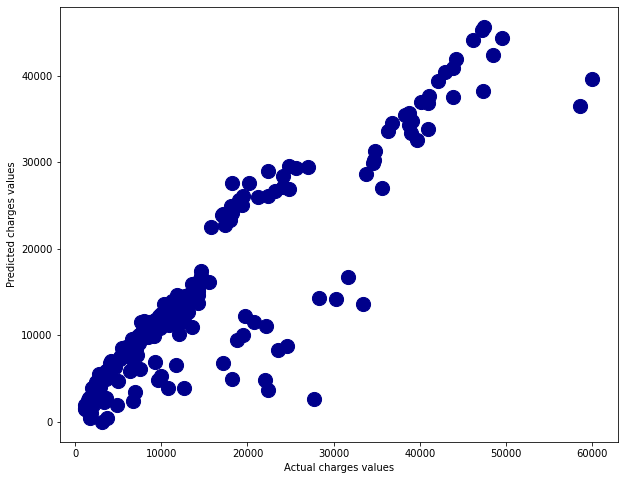

In [65]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [66]:
r2_score(y_test, y_pred)

0.8330531047074838

In [67]:
model_relu_with_ES.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                320       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


# Save weights (use with TensorFlow)

In [68]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights")

In [69]:
!ls my_models/

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Save weights with h5 (use with other platforms)

In [70]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights.h5", save_format="h5")

In [77]:
!ls my_models/

'ls' is not recognized as an internal or external command,
operable program or batch file.


#  Model as a  json 

In [72]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_15_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_

# Save json to disk

In [73]:
with open('./my_models/relu_64_config.json', 'w') as outfile: 
    
    outfile.write(relu_64_json) 

In [74]:
!cat my_models/relu_64_config.json

'cat' is not recognized as an internal or external command,
operable program or batch file.


# Saving entire model

In [75]:
model_relu_with_ES.save("./my_models/relu_64_config_weights")

INFO:tensorflow:Assets written to: ./my_models/relu_64_config_weights\assets


In [76]:
!ls my_models/relu_64_config_weights 

'ls' is not recognized as an internal or external command,
operable program or batch file.
